In [1]:
# imports
# data science imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# data processing
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# unsupervised algorithms
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

# metrics
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
# pandas display options
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

In [3]:
# read in data
file = 'crypto_data.csv'
df = pd.read_csv(file)
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


In [5]:
# Discard all cryptocurrencies that are not being traded. In other words, filter for currencies that are currently being traded. Once you have done this, drop the IsTrading column from the dataframe.

In [6]:
df.IsTrading.value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [7]:
df2 = df.loc[df.IsTrading].reset_index(drop=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1144 non-null   object 
 1   CoinName         1144 non-null   object 
 2   Algorithm        1144 non-null   object 
 3   IsTrading        1144 non-null   bool   
 4   ProofType        1144 non-null   object 
 5   TotalCoinsMined  685 non-null    float64
 6   TotalCoinSupply  1144 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 54.9+ KB


In [8]:
df2 = df2.drop(["IsTrading"], axis=1)
df2.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [9]:
# Remove all rows that have at least one null value.
df2 = df2.dropna(how="any").reset_index(drop=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       685 non-null    object 
 1   CoinName         685 non-null    object 
 2   Algorithm        685 non-null    object 
 3   ProofType        685 non-null    object 
 4   TotalCoinsMined  685 non-null    float64
 5   TotalCoinSupply  685 non-null    object 
dtypes: float64(1), object(5)
memory usage: 32.2+ KB


In [10]:
# Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero
mask = df2.TotalCoinsMined > 0
df2 = df2.loc[mask].reset_index(drop=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       532 non-null    object 
 1   CoinName         532 non-null    object 
 2   Algorithm        532 non-null    object 
 3   ProofType        532 non-null    object 
 4   TotalCoinsMined  532 non-null    float64
 5   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), object(5)
memory usage: 25.1+ KB


In [11]:
# In order for your dataset to be comprehensible to a machine learning algorithm, its data should be numeric. Since the coin names do not contribute to the analysis of the data, delete the CoinName from the original dataframe.

In [12]:
df2 = df2.drop(['Unnamed: 0', 'CoinName'], axis=1)
df2.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
1,Scrypt,PoW/PoS,1.055185e+09,532000000
2,X13,PoW/PoS,2.927942e+10,314159265359
3,SHA-256,PoW,1.792718e+07,21000000
4,Ethash,PoW,1.076842e+08,0


In [13]:
#cast all columns to an integer
df2["TotalCoinSupply"] = df2.TotalCoinSupply.astype(float)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   ProofType        532 non-null    object 
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    float64
dtypes: float64(2), object(2)
memory usage: 16.8+ KB


In [14]:
# Your next step in data preparation is to convert the remaining features with text values, Algorithm and ProofType, into numerical data. To accomplish this task, use Pandas to create dummy variables. Examine the number of rows and columns of your dataset now. How did they change?

In [15]:
print(df2.Algorithm.nunique())
df2.Algorithm.value_counts()

71


Scrypt                    182
X11                        73
SHA-256                    48
CryptoNight                19
X13                        17
PoS                        17
Quark                      13
Equihash                   12
NeoScrypt                  10
NIST5                      10
Multiple                    9
Ethash                      9
DPoS                        7
XEVAN                       6
CryptoNight-V7              5
X16R                        4
Lyra2RE                     4
Groestl                     4
X15                         4
SHA-256D                    4
Lyra2REv2                   4
Lyra2Z                      4
Blake                       3
QuBit                       3
POS 3.0                     3
Dagger                      3
SHA-512                     3
CryptoNight Heavy           2
Skein                       2
Keccak                      2
C11                         2
PHI1612                     2
BLAKE256                    2
Blake2b   

In [16]:
# anything less than 10 will go in a "other" bucket
alg = df2.Algorithm.value_counts()
alg_rename = list(alg[alg < 12].index)
alg_rename[0:10]

['NeoScrypt',
 'NIST5',
 'Multiple',
 'Ethash',
 'DPoS',
 'XEVAN',
 'CryptoNight-V7',
 'X16R',
 'Lyra2RE',
 'Groestl']

In [17]:
mask = df2.Algorithm.isin(alg_rename)
df2.loc[mask, "Algorithm"] = "Other"

df2.Algorithm.value_counts()

Scrypt         182
Other          151
X11             73
SHA-256         48
CryptoNight     19
X13             17
PoS             17
Quark           13
Equihash        12
Name: Algorithm, dtype: int64

In [18]:
# REPEAT the same for Proof Type
print(df2.ProofType.nunique())
df2.ProofType.value_counts()

25


PoW                     237
PoW/PoS                 176
PoS                      86
DPoS                      9
PoC                       3
PoS/PoW                   2
POBh                      1
LPoS                      1
Proof of Trust            1
Pos                       1
DPOS                      1
Zero-Knowledge Proof      1
HPoW                      1
PoA                       1
PoW + Hive                1
PoW/PoS                   1
PoW and PoS               1
Proof of Authority        1
TPoS                      1
PoW/PoW                   1
dPoW/PoW                  1
PoW/nPoS                  1
PoST                      1
PoS/PoW/PoT               1
PoS/LPoS                  1
Name: ProofType, dtype: int64

In [19]:
# combine some columns due to name repetition
df2.loc[df2.ProofType == 'PoW/PoW ', "ProofType"] = "PoW"
df2.loc[df2.ProofType == 'PoS/PoW', "ProofType"] = "PoW/PoS"
df2.loc[df2.ProofType == 'PoW/PoS ', "ProofType"] = "PoW/PoS"
df2.loc[df2.ProofType == 'PoW and PoS', "ProofType"] = "PoW/PoS"
df2.loc[df2.ProofType == 'Pos', "ProofType"] = "PoS"

In [20]:
# anything less than 80 will go in a "other" bucket
prooft = df2.ProofType.value_counts()
prooft_rename = list(prooft[prooft < 80].index)
prooft_rename[0:10]

['DPoS',
 'PoC',
 'PoW + Hive',
 'LPoS',
 'Proof of Trust',
 'DPOS',
 'Zero-Knowledge Proof',
 'HPoW',
 'PoA',
 'TPoS']

In [21]:
mask = df2.ProofType.isin(prooft_rename)
df2.loc[mask, "ProofType"] = "Other"

df2.ProofType.value_counts()

PoW        237
PoW/PoS    180
PoS         87
Other       28
Name: ProofType, dtype: int64

In [22]:
df2.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
1,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
2,X13,PoW/PoS,2.927942e+10,3.141593e+11
3,SHA-256,PoW,1.792718e+07,2.100000e+07
4,Other,PoW,1.076842e+08,0.000000e+00


In [23]:
#One Hot Encode 
oh_cols = ["Algorithm", "ProofType"]
df_oh = df2.loc[:, oh_cols]

df_oh = pd.get_dummies(df_oh)
df_oh.head()


,Algorithm_CryptoNight,Algorithm_Equihash,Algorithm_Other,Algorithm_PoS,Algorithm_Quark,Algorithm_SHA-256,Algorithm_Scrypt,Algorithm_X11,Algorithm_X13,ProofType_Other,ProofType_PoS,ProofType_PoW,ProofType_PoW/PoS
0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,0,1,0


In [24]:
num_cols = ["TotalCoinsMined", "TotalCoinSupply"]
df_num = df2.loc[:, num_cols]

scaler = StandardScaler()
scaler.fit(df_num)

df_num = pd.DataFrame(scaler.transform(df_num), columns=num_cols)
df_num.head()

,TotalCoinsMined,TotalCoinSupply
0,-0.117108,-0.152870
1,-0.093970,-0.145009
2,0.524946,4.489424
3,-0.116715,-0.152560
4,-0.114747,-0.152870


In [25]:
#combine them both back
df_train = pd.concat([df_num, df_oh], axis=1)
df_train.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_CryptoNight,Algorithm_Equihash,Algorithm_Other,Algorithm_PoS,Algorithm_Quark,Algorithm_SHA-256,Algorithm_Scrypt,Algorithm_X11,Algorithm_X13,ProofType_Other,ProofType_PoS,ProofType_PoW,ProofType_PoW/PoS
0,-0.117108,-0.152870,0,0,0,0,0,0,1,0,0,0,0,0,1
1,-0.093970,-0.145009,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0.524946,4.489424,0,0,0,0,0,0,0,0,1,0,0,0,1
3,-0.116715,-0.152560,0,0,0,0,0,1,0,0,0,0,0,1,0
4,-0.114747,-0.152870,0,0,1,0,0,0,0,0,0,0,0,1,0


In [26]:
# TSNE
tsne = TSNE(random_state=42)
tsne_features = tsne.fit_transform(df_train)
print(tsne_features.shape)

tsne_df = pd.DataFrame(tsne_features, columns=["Feature1", "Feature2"])
tsne_df.head()

(532, 2)


,Feature1,Feature2
0,-18.892368,-10.791236
1,-13.010828,-14.682109
2,6.653805,-7.935745
3,10.809381,1.387687
4,20.850760,13.883802


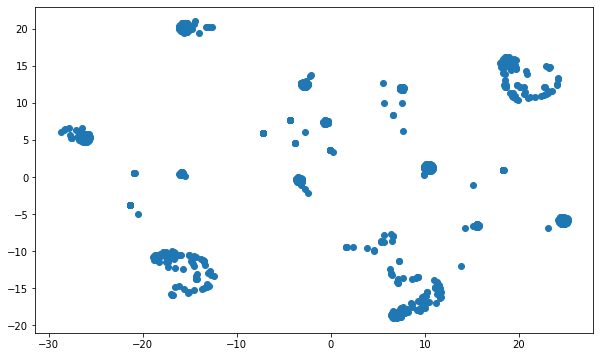

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(tsne_df["Feature1"], tsne_df["Feature2"])
plt.show()

[0.498, 0.119, 0.093, 0.084, 0.061, 0.052, 0.031, 0.018, 0.014, 0.009, 0.008, 0.008, 0.006, 0.0, 0.0]


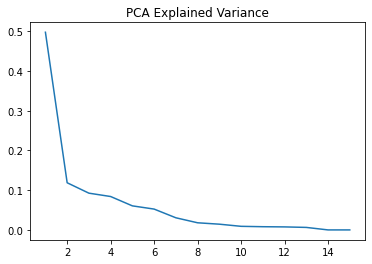

In [28]:
# PCA

# Initialize PCA model
pca = PCA(n_components=len(df_train.columns))
pca.fit(df_train)

print([round(x, 3) for x in pca.explained_variance_ratio_])
plt.plot(range(1,len(df_train.columns)+1), pca.explained_variance_ratio_)
plt.title("PCA Explained Variance")
plt.show()

In [29]:
#  For this project, preserve 90% of the explained variance in dimensionality reduction. How did the number of the features change?
pca = PCA(n_components=0.90)
pca.fit(df_train)

print([round(x, 3) for x in pca.explained_variance_ratio_])
#there are way less features when preserving 90% of the explained variance

[0.498, 0.119, 0.093, 0.084, 0.061, 0.052]


In [30]:
df_pca = pd.DataFrame(pca.transform(df_train))
df_pca.columns = [f"Feature {x}" for x in range(1, len(pca.explained_variance_ratio_)+1)]
df_pca.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6
0,-0.216885,-0.920063,0.414123,-0.240304,-0.200537,-0.282485
1,-0.194995,-0.922021,0.407740,-0.248647,-0.200715,-0.281021
2,3.523615,-0.495511,1.608541,2.452646,-0.196841,-0.039832
3,-0.185139,0.636163,0.082121,-0.136267,-0.067368,0.506872
4,-0.159985,0.860422,-0.400018,0.114043,-0.318328,-0.293537


In [31]:
# un t-SNE on the principal components: the output of the PCA transformation. Then create a scatter plot of the t-SNE output. Observe whether there are distinct clusters or not.

In [32]:
# TSNE
tsne = TSNE(random_state=42)
tsne_features = tsne.fit_transform(df_pca)
print(tsne_features.shape)

tsne_df = pd.DataFrame(tsne_features, columns=["Feature1", "Feature2"])
tsne_df.head()

(532, 2)


,Feature1,Feature2
0,-9.563703,-25.516394
1,-3.871848,-24.610504
2,10.258831,-6.348359
3,25.356108,6.930036
4,4.267732,26.803890


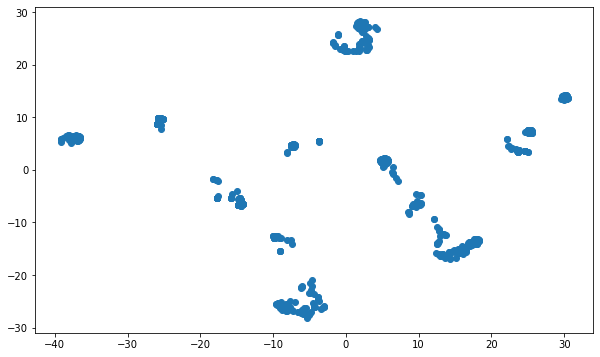

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(tsne_df["Feature1"], tsne_df["Feature2"])
plt.show()

C:\Users\yvonne\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


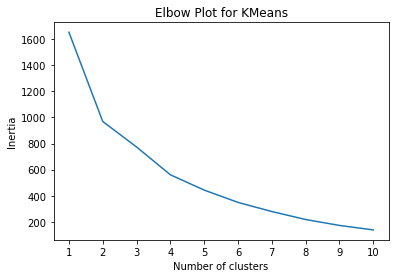

In [34]:
# Create an elbow plot to identify the best number of clusters. Use a for-loop to determine the inertia for each k between 1 through 10. Determine, if possible, where the elbow of the plot is, and at which value of k it appears.

# KMEANS
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(df_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("Elbow Plot for KMeans")
plt.show()

In [35]:
# States a brief (1-2 sentence) conclusion on whether cryptocurrencies can be clustered together, and supports it with findings
# Based on my findings, cryptocurrencies can be cluster into 4 distinct groups as proven with the dataset provided.